# XGBoost model to diagnose Diabetes with health indicators


   Diabetes is a chronic disease that occurs when the body cannot effectively use insulin it produces or when the
pancreas does not produce enough insulin. Insulin is a hormone which regulates the amount of glucose in the blood.
When there isn’t enough insulin or cells stop responding to insulin it causes the increase of blood sugar level since
the blood sugar cannot enter the body's cells to be used for energy. Because of this condition body may start to
break down fat and muscle tissue for energy, causing serious health problems such as heart disease, kidney disease
and nerve damage. Diabetes has become a major health issue worldwide since it damages heart, blood vessels,
kidneys, eyes and nerves overtime.

About 422 million people worldwide have diabetes, the majority living in low and middle-income countries and 1.5
million deaths directly caused by diabetes each year. Diabetes also places a massive burden on the economy, with
diagnosed diabetes costs of roughly 327 billion dollars and total costs with undiagnosed diabetes and prediabetes
approaching $400 billion dollars annually. Prevalence of diabetes has become a major concern as diabetes has
become a major public health problem worldwide.

In this analysis, a cleaned and consolidated dataset created from BRFSS (Behavioral Risk Factor Surveillance System)
2015 dataset was used. The Behavioral Risk Factor Surveillance System (BRFSS) is the nation's premier system of
health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk
behaviors, chronic health conditions, and use of preventive services. BRFSS was established in 1984 with 15 states
and now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes
more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system
in the world. The objective of this analysis is to develop a predictive model to identify the risk factors of diabetes
and provide a decision-based model to diagnosis this disease at an early stage.

### Data Preprocessing

This dataset consists of 253,680 survey responses of BRFSS2015. Target variable is Diabetes_012 which indicates
whether the individual has diabetes or not.
    0 - No diabetes , 1 - pre diabetes/ diabetes

There are 21 features in the dataset including both categorical and numerical attributes. The features include
various risk factors for Diabetes identified in research such as blood pressure, cholesterol, BMI, diet, age etc.
Following are the binary categorical attributes in the dataset.

Following are the binary categorical attributes in the dataset.

Following are the discrete attributes in the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

In [10]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [12]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


###  Exploratory Data Analysis 

EDA was used to identify the distributions of the attributes, find outliers and the relationships between the target
attribute and the features. Boxplots, histograms and bar charts were used to visualize the data.

-  The target attribute ‘Diabetes_binary’ has 2 classes. 0 is for no diabetes, and 1 is for prediabetes ordiabetes. There is class imbalance in the dataset. Around 86% of the responses belong to the negative class and only 14% of the responses belong to the positive class. Figure 1 shows the frequency distribution of the target classes.

-  Figures 2 shows the boxplots of the discrete attributes. There are outliers for the attributes BMI, MentHlth and PhysHlth.

<AxesSubplot:>

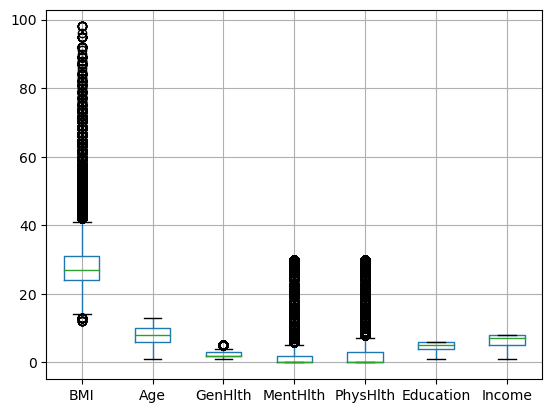

In [3]:
numerical_col=['BMI','Age','GenHlth','MentHlth','PhysHlth','Education','Income']

df.boxplot(numerical_col)

#### Outlier detection

Outliers are the observations which deviates from the normal behavior of the data. It is very important to detect
outliers and remove them before the model building since it can severely impact the accuracy of a predictive
model. In the exploratory data analysis, some attributes were identified with outliers as shown in Figure 2. The
data points which stand three standard deviations away from the attribute distribution were considered as outliers
and removed from the analysis for the attributes BMI, MentHlth and PhysHlth.


In [43]:
mean_BMI=df['BMI'].mean()
sd_BMI=df['BMI'].std()
df1=df[(df['BMI']<=mean_BMI+3*sd_BMI)]

mean_mh=df1['PhysHlth'].mean()
sd_mh=df1['PhysHlth'].std()
df1=df1[(df1['PhysHlth']<=mean_mh+3*sd_mh)]

mean_mh=df1['MentHlth'].mean()
sd_mh=df1['MentHlth'].std()
df1=df1[(df1['MentHlth']<=mean_mh+3*sd_mh)]

- Distributions of HighBP, HighCol, ColCheck, Stroke, HeartDiseasorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump and DiffWalk indicates some differences in the proportions for diabetes positive and negative classes. Chi Square test and Information gain will be used to further analyze these relationships and identify most relevant features for the target attribute.

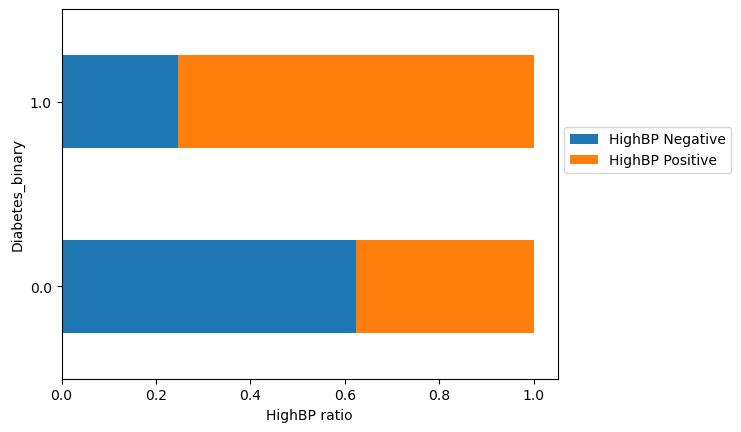

In [38]:
hb_group = df.groupby(['Diabetes_binary', 'HighBP']).size().unstack()
hb_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(['HighBP Negative', 'HighBP Positive'], bbox_to_anchor=(1.0, 0.7))
plt.xlabel('HighBP ratio')
plt.show()

<Figure size 600x300 with 0 Axes>

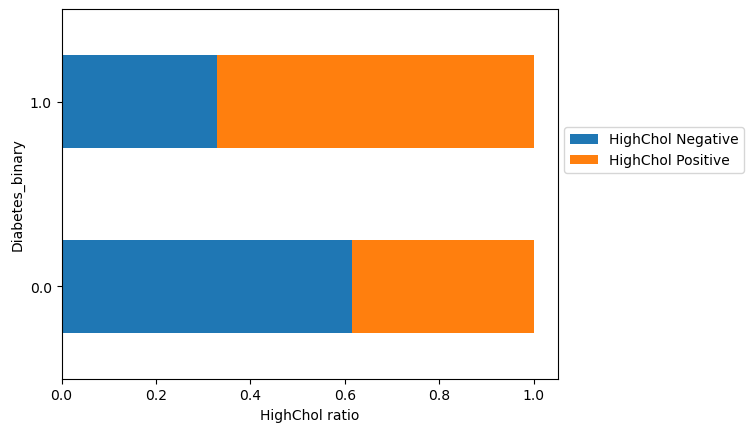

In [66]:
plt.figure(figsize=(6,3))
hc_group = df.groupby(['Diabetes_binary', 'HighChol']).size().unstack()

hc_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(['HighChol Negative', 'HighChol Positive'], bbox_to_anchor=(1.0, 0.7))

plt.xlabel('HighChol ratio')
plt.show()

<Figure size 600x300 with 0 Axes>

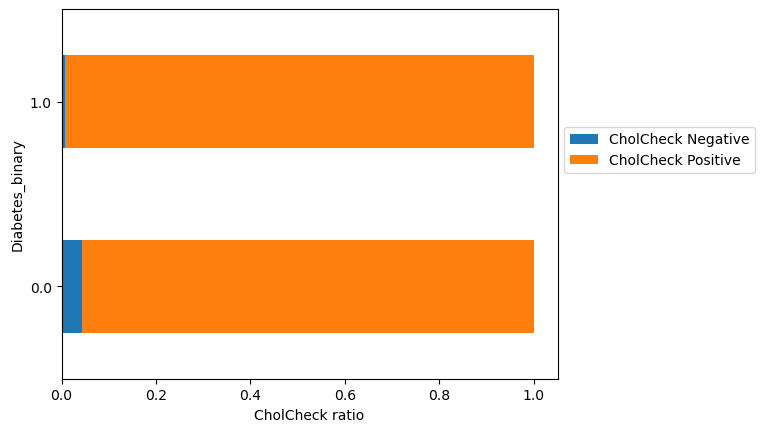

In [65]:
plt.figure(figsize=(6,3))
cc_group = df.groupby(['Diabetes_binary', 'CholCheck']).size().unstack()
cc_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(['CholCheck Negative', 'CholCheck Positive'], bbox_to_anchor=(1.0, 0.7))
plt.xlabel('CholCheck ratio')
plt.show()

- According to the above visualizations, the people who have high blood pressure, high cholesterol, stroke, heart attack, high alcohol consumption and difficulty in walk have a higher probability of having Diabetes compared to the people who don’t have those health issues.

- It seems higher BMI values increases the probability of having diabetes compared to the lower BMI values. 

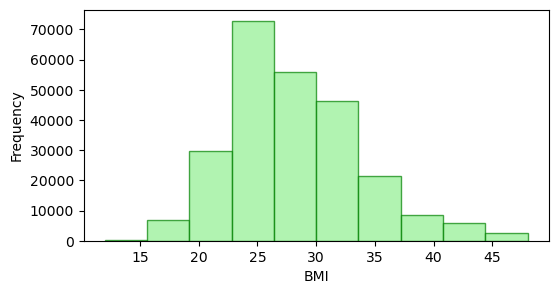

In [64]:
plt.figure(figsize=(6,3))
plt.hist(df1['BMI'], alpha=0.7, color='lightgreen',ec='green')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

<Figure size 600x300 with 0 Axes>

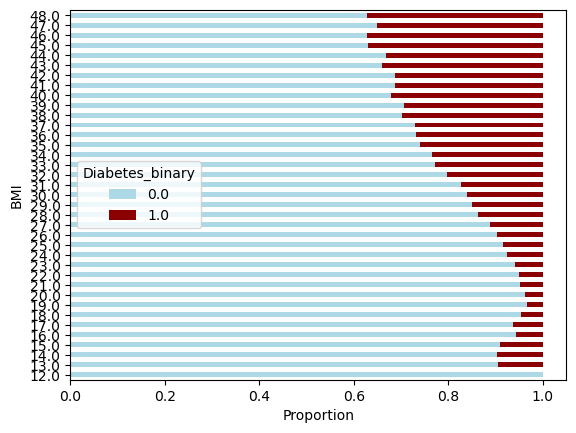

In [67]:
hb_group = df1.groupby([ 'BMI','Diabetes_binary']).size().unstack()
plt.figure(figsize=(6,3))
hb_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', color=['lightblue','darkred'],stacked=True, alpha=1, legend=True)
#plt.legend(['Diabetes Negative', 'Diabetes Positive'], bbox_to_anchor=(1.0, 0.7))

plt.xlabel('Proportion')
plt.show()

- According to the probability distributions with target attribute, the risk of having diabetes gradually increase with the age. The highest risk of having diabetes is reported in the age category 11. 

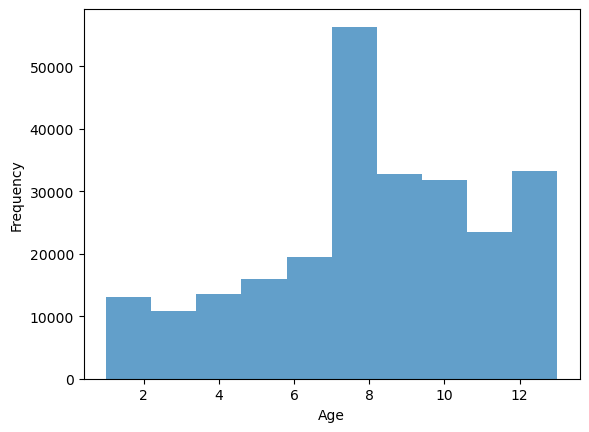

In [54]:
plt.figure()
plt.hist(df1['Age'], alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Figure size 600x300 with 0 Axes>

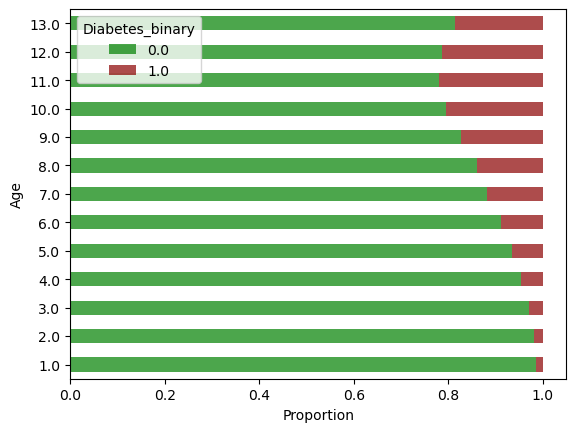

In [68]:
hb_group = df.groupby([ 'Age','Diabetes_binary']).size().unstack()
plt.figure(figsize=(6,3))
hb_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', color=['green','darkred'], alpha=0.7,stacked=True, legend=True)
#plt.legend(['Diabetes Negative', 'Diabetes Positive'], bbox_to_anchor=(1.0, 0.7))

plt.xlabel('Proportion')
plt.show()

- Income attribute consists of eight categories. Category 1 represents the group with income less than 10000 dollars and category 8 represents the group with income higher than 75000 dollars. The distribution indicates a decrement of the risk of having diabetes when the income increases.


<Figure size 600x300 with 0 Axes>

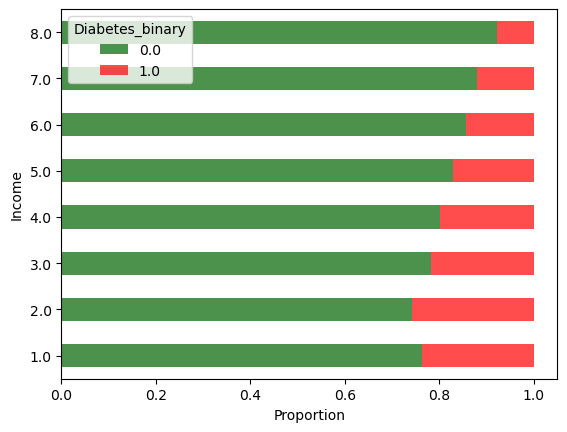

In [69]:
hb_group = df1.groupby([ 'Income','Diabetes_binary']).size().unstack()
plt.figure(figsize=(6,3))
hb_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh',color=['darkgreen','red'], alpha=0.7,stacked=True, legend=True)
#plt.legend(['Diabetes Negative', 'Diabetes Positive'], bbox_to_anchor=(1.0, 0.7))

plt.xlabel('Proportion')
plt.show()

- Education level is represented by six levels. Level 1 represents the low level and level 6 represents the highest level. It seems low levels have a higher risk of having diabetes compared with the groups with higher education level.

<Figure size 600x300 with 0 Axes>

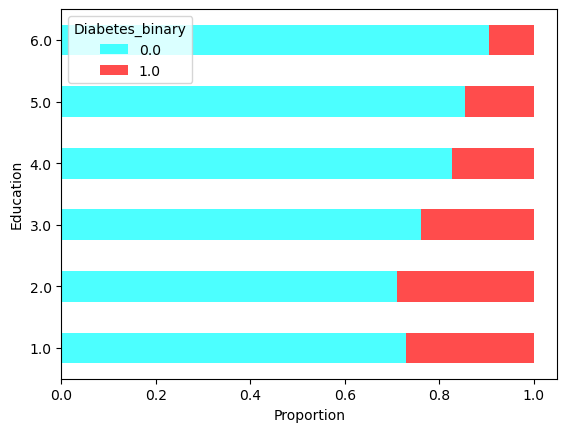

In [70]:
hb_group = df1.groupby([ 'Education','Diabetes_binary']).size().unstack()
plt.figure(figsize=(6,3))
hb_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh',color=['cyan','red'], alpha=0.7, stacked=True, legend=True)
#plt.legend(['Diabetes Negative', 'Diabetes Positive'], bbox_to_anchor=(1.0, 0.7))

plt.xlabel('Proportion')
plt.show()

### Feature selection


#### Selection of relevant features for the target attribute

Chi square test and mutual information methods were used for the feature selection since all the predictor
variables were categorical ordinal. Objective is to build the models using the selected subset of features from both
methods and evaluate their performance using suitable evaluation matrices to ensure that the selected features
are informative and not biased towards the minority class.

Chi square test is used to measure the independence of two events using the deviation between observed
distribution and the expected distribution.

Mutual information measures the reduction in uncertainty of the target variable given the value of the predictor
variable. Mutual information is always larger than or equal to zero. Zero indicates that the two variables are
independent.

Chi square test and information gain method have their own advantages and disadvantages as follows.

- Information gain method gives more weight to features with rare classes. This can lead to overfitting since the rare features may not always be most informative.
- The chi-square test assumes that the sample size is large enough for the test statistic to follow a chisquare distribution. This will lead to biased results if the dataset is imbalanced with few instances for the minority class

Following visualizations shows the scores obtained by each attribute in chi square test and mutual information
method. There are some significant differences between the features selected from the two methods.

Mutual information method identifies ‘GenHlth’ attribute as the most relevant attribute but chi square test selects
‘PhysHlth’ as the most relevant attribute for identifying people with higher risk of having diabetes. ‘CholCheck’
attribute has obtained the second highest rank in mutual information method but it has a very low rank in Chi
square test.

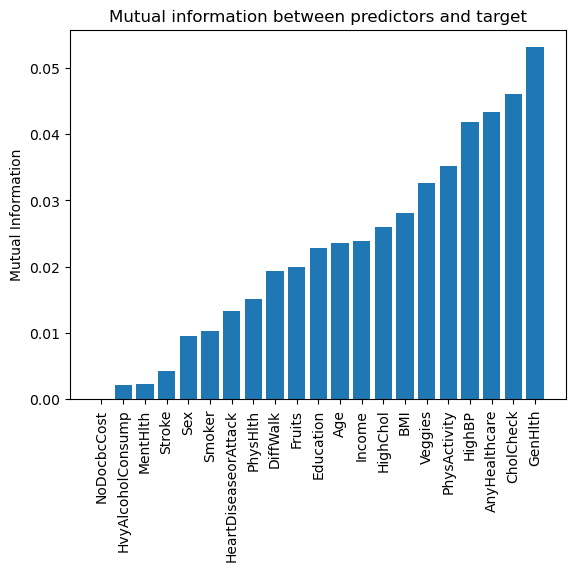

In [71]:
from sklearn.feature_selection import mutual_info_classif
X=df1[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]
y = df1['Diabetes_binary']
# Calculate the mutual information between features and target variable
mutual_info = mutual_info_classif(X, y)
dic_info_gain={}
# Print the mutual information scores for each feature
for feature, score in zip(X.columns, mutual_info):
    dic_info_gain[feature]=score
    
sorted_dic_info_gain = dict(sorted(dic_info_gain.items(), key=lambda x:x[1]))
names = list(sorted_dic_info_gain.keys())
values = list(sorted_dic_info_gain.values())

plt.bar(range(len(sorted_dic_info_gain)), values, tick_label=names)

plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")
plt.xticks(rotation = 90) 
plt.show()

Feature 0: score=9750.166428335739, p-value=0.0
Feature 1: score=5707.697083333619, p-value=0.0
Feature 2: score=38.61674141999363, p-value=5.157463830910878e-10
Feature 3: score=14707.25846338693, p-value=0.0
Feature 4: score=524.6523745789923, p-value=4.114952000143068e-116
Feature 5: score=2705.631618728351, p-value=0.0
Feature 6: score=7167.93886922946, p-value=0.0
Feature 7: score=776.9675301336155, p-value=5.493207133682343e-171
Feature 8: score=142.41766820199857, p-value=7.880553722497732e-33
Feature 9: score=147.44983230341086, p-value=6.257439069440036e-34
Feature 10: score=750.6745193051067, p-value=2.8624432129770286e-165
Feature 11: score=3.4173998054715398, p-value=0.06451255022785256
Feature 12: score=201.76029582747438, p-value=8.623908714114543e-46
Feature 13: score=9508.243754062574, p-value=0.0
Feature 14: score=18633.093926999823, p-value=0.0
Feature 15: score=123476.94820513736, p-value=0.0
Feature 16: score=9411.42679116616, p-value=0.0
Feature 17: score=160.62801

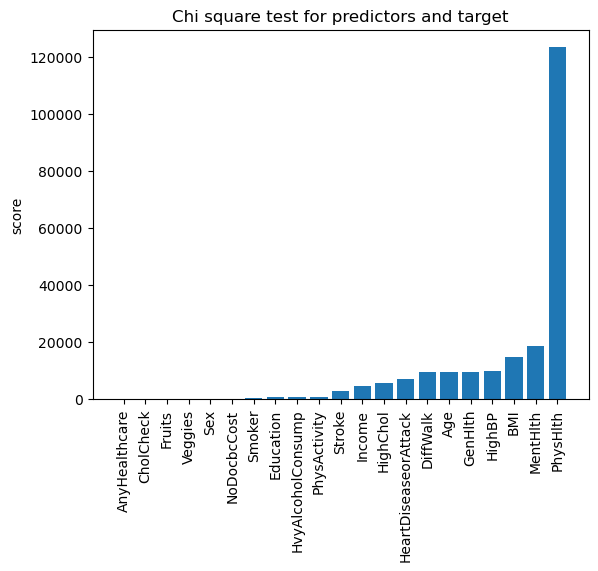

In [73]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
# Apply the chi-square test to select the k best features
k =21  # Select the top 5 features
skb = SelectKBest(score_func=chi2, k=k)
X_new = skb.fit_transform(X, y)

feature_names = X.columns
# Print the scores and p-values of each feature
scores = skb.scores_
pvalues = skb.pvalues_
chi_p_columns={}
chi_score_columns={}
for i in range(len(scores)):
    print(f"Feature {i}: score={scores[i]}, p-value={pvalues[i]}")
    chi_p_columns[feature_names[i]]=pvalues[i]
    chi_score_columns[feature_names[i]]=scores[i]
# Print the top k features

top_k_idx = skb.get_support(indices=True)
top_k_features = feature_names[top_k_idx]

sort_chi=dict(sorted(chi_p_columns.items(), key=lambda x:x[1]))
sort_score=dict(sorted(chi_score_columns.items(), key=lambda x:x[1]))
names = list(sort_score.keys())
values = list(sort_score.values())

plt.bar(range(len(sort_score)), values, tick_label=names)

plt.ylabel('score')
plt.title("Chi square test for predictors and target")
plt.xticks(rotation = 90) 
plt.show()

### Elimination of redundant features

Elimination of redundant features is very important in machine learning since the redundant features can reduce
the model’s generalization ability and the accuracy. Cramer’s V was used to identify the redundant features in the
dataset. Cramer’s V is a measure of association between categorical variables. Cramer’s V was calculated for each
pair of features in the dataset.

In [74]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [75]:
# Import association_metrics  
import association_metrics as am
# Convert you str columns to Category columns
X1=X
#X1 = X1.apply(
       #lambda x: x.astype("category") if x.dtype == "O" else x)
X1 = X1.astype('category')
# Initialize a CamresV object using you pandas.DataFrame
cramersv = am.CramersV(X1) 
# will return a pairwise matrix filled with Cramer's V, where columns and index are 
# the categorical variables of the passed pandas.DataFrame
crV=cramersv.fit()

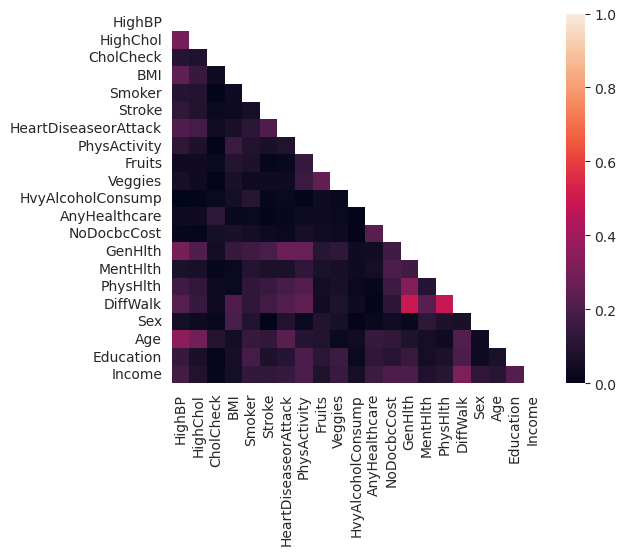

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(cramersv.fit())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(crV, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

If the Cramers’s V value is larger than 0.3, those features were considered as correlated features in this analysis.
There were three sets of features which satisfied the above condition.

- The elimination of redundant features was done using the ranks obtained by the redundant features in both Chi square test and Mutual information.
- HighBP and Age were identified as redundant features. HighBP is the 4th relavant feature in both Chi square test and mutual information method. Age has higher rank than HighBP in Chi squae test but it has lower rank in MI method. So that, Age was removed from models built based on MI method and HighBP was removed from the models built based on Chi square test.
- Similar way, Diffwalk was removed from the models since the PhysHlth and GenHelth have the highest ranks in Chi square test and MI method respectively.

### XGBoost (Extreme Gradient Boosting) Model


   XGBoost is an efficient implementation of stochastic gradient boosting algorithm. This algorithm offers a way to
tune the parameters giving more weights to the classification of the minority class in an imbalanced dataset. This
version of XGboost algorithm is called class weighted XGBoost or cost sensitive XGBoost and can offer better
performance in binary classification with class imbalance.

The hyperparameter which is designed to tune the XGBoost algorithm for imbalanced classification is
scale_pos_weight hyperparameter. This parameter is used the scale the gradient of the positive class. A sensible
default value to set for the scale_pos_weight hyperparameter is the inverse of the class distribution. In this dataset
, the ratio between diabetes negative (0) and diabetes positive (1) is 7 to 1. Hence the optimal value for
scale_pos_weight can be selected as 7 which means the model gives seven times larger weight to the classification
of positive class. When scale_pos_weight is set to 1, the algorithm gives same weight for bot positive and negative
classifications.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
model_summary=[]
#scale_pos_weight=7
for k in range(1,21):
    skb = SelectKBest(score_func=chi2, k=k)
    X_new = skb.fit_transform(X, y)
    feature_names = X.columns
    #scores = skb.scores_
    #pvalues = skb.pvalues_
    #chi_p_columns={}
    #chi_score_columns={}

    
    top_k_idx = skb.get_support(indices=True)
    top_k_features = feature_names[top_k_idx]
    
    # define model
    model = XGBClassifier(scale_pos_weight=7)
# define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
    scores = cross_val_score(model, X[list(top_k_features)], y, scoring='roc_auc', cv=cv, n_jobs=-1)
    mean_score=np.mean(scores)
# summarize performance
    model_summary.append({'k':k,'top_k_features':top_k_features,'mean_roc_auc':mean_score})

### Evaluation

AUC ROC was used as the evaluation matric and 10-fold cross validation was used. AUC ROC is a good measure of
evaluation when the dataset has class imbalance.

- Different models were created using the best k features obtained from both Chi square and mutual information.
- And another two types of models were built considering the redundant features. Redundant features were removed in one set of models and they were not removed in the other set of models.
- And 1 and 7 values were used for the hyper parameter values for scale_pos_weight. The aim is to find the best model with highest AUC ROC. The best mean auc roc score obtained by the model 

In [ ]:
df_p7_chi = pd.DataFrame(model_summary)

In [ ]:
seaborn.lineplot(data=df_p7_chi,x='k',y='mean_roc_auc').set_title('ROC AUC for best k features selected from Chi Square test (scale_pos_weight=7)')

The best model with highest mean ROC AUC was obtained with scale_pos_weight = 1 and without redundant
feature elimination for the model with best 20 relevant features selected from Chi square test.